<a href="https://colab.research.google.com/github/RubenMcCarty/Deep-Learning-RQ/blob/main/TYNPU_DATA_SCIENTIST_EXAMEN_RUBEN_QUISPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Solicitud de tarjetas de credito en el banco Tynpu**
# [RUBEN QUISPE](https://www.linkedin.com/in/ruben-quispe-l/)

Caso: El banco Tynpu recibe muchas solicitudes de tarjetas de crédito. Muchas de ellas son rechazadas por diversas razones, como deudas elevadas de préstamos, bajos niveles de ingresos o demasiadas consultas sobre el informe crediticio de una persona, etc. El análisis manual de estas aplicaciones es pesado, propenso a errores y requiere mucho tiempo. Afortunadamente, esta tarea se puede automatizar con el poder del aprendizaje automático y prácticamente todos los bancos comerciales lo hacen hoy en día. Tu tarea en este examen es desarrollar un modelo predictivo de aprobación de tarjetas de crédito utilizando técnicas de aprendizaje automático, tal como lo hacen los bancos reales.

Usarás un dataset que tiene la información necesaria para completar la tarea propuesta, el cual te hemos mandado por correo o también lo puedes descargar de [aquí](https://drive.google.com/file/d/1PGysvgrvHx3Z3lFr6jc-oSN9l7l6Z71E/view?usp=sharing). Debes cargarlo al entorno de ejecución para poder usarlo más adelante. 

La estructura de este notebook es la siguiente:

- Primero, comienza cargando y viendo el dataset.
- Verás  que el dataset tiene una mezcla de variables numéricas y no numéricas, que contiene valores de diferentes rangos, además de que contiene algunos datos faltantes.
- Tendrás que preprocesar el dataset para garantizar que el modelo de ML pueda hacer buenas predicciones.
- Una vez que los datos estén en buen estado, harás un análisis exploratorio de datos para derivar intuiciones.
- Finalmente, construirás un modelo de que pueda predecir si se aceptará o no la solicitud de una tarjeta de crédito de una persona.

**Nota:** Los nombres de las columnas son anónimos sin embargo esto no debe impedir realizar una correcta evaluación.

**Nota:** Cada vez que veas ... o # ... TU CÓDIGO AQUÍ ... debes completar con una o más líneas de código.

In [51]:
# Importa pandas
# ... TU CÓDIGO AQUÍ ...
import pandas as pd
# Carga el dataset usando read_csv
cc_apps = pd.read_csv('cc_approvals.data')

# Inspecciona los datos (haz print)
# ... TU CÓDIGO AQUÍ ...
cc_apps

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


Vemos que nuestra dataset no tiene cabecera y la primera fila esta como cabecera, por lo cual estamos perdiendo la primera fila
entonces debemos leer sin cabecera de la siguiete forma



In [52]:
cc_apps = pd.read_csv('cc_approvals.data', header =None)
cc_apps

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


Ahora si esta completo nuestro data set de 690 filas por 16 columnas

In [53]:
# imprimimos los 5 primeras filas
cc_apps.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [54]:
#tamaño de la data es
cc_apps.shape

(690, 16)

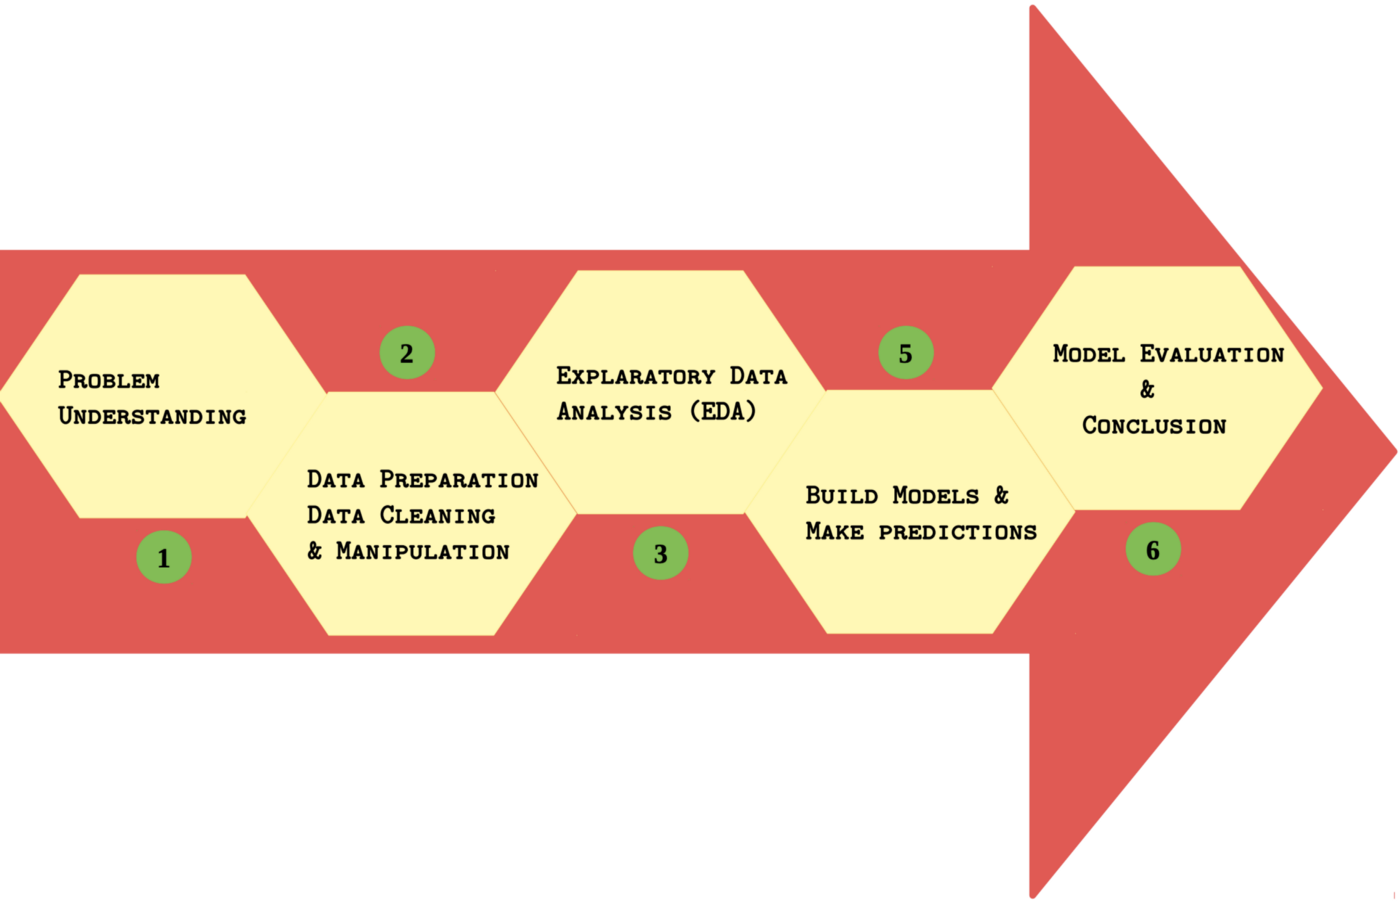

### **2. Inspecciona las solicitudes**

El resultado puede parecer un poco confuso a primera vista, pero intentarás descubrir cuáles son las variables más importantes. Como puedes ver desde el primer vistazo a los datos, el dataset tiene una mezcla de características numéricas y no numéricas. Esto se puede solucionar con un preprocesamiento, pero antes de hacerlo, revisa un poco más el dataset para ver si hay otros problemas que deben solucionarse.

In [55]:
# Haz print del resumen estadístico
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print('\n')

# Haz print de la información del dataframe
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print('\n')

# Inspecciona las últimas 17 filas en búsqueda de valores faltantes en el dataset
# ... TU CÓDIGO AQUÍ ...
cc_apps_tail = cc_apps.tail(17)
print(cc_apps_tail)

               1           2           7          10             14
count  690.000000  690.000000  690.000000  690.00000     690.000000
mean    31.568029    4.758725    2.223406    2.40000    1017.385507
std     11.853273    4.978163    3.346513    4.86294    5210.102598
min     13.750000    0.000000    0.000000    0.00000       0.000000
25%     22.670000    1.000000    0.165000    0.00000       0.000000
50%     28.625000    2.750000    1.000000    0.00000       5.000000
75%     37.707500    7.207500    2.625000    3.00000     395.500000
max     80.250000   28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-n

Vemos las ultimas 17 filas del dataset, vemos que la dataset tiene datos faltantes, valores atipicos (?) en el index 673 



In [56]:
 cc_apps.describe()

,1,2,7,10,14
count,690.000000,690.000000,690.000000,690.00000,690.000000
mean,31.568029,4.758725,2.223406,2.40000,1017.385507
std,11.853273,4.978163,3.346513,4.86294,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000
max,80.250000,28.000000,28.500000,67.00000,100000.000000


# Si quisiéramos obtener un resumen estadístico de cada columna, como el recuento, el valor medio de la columna, la desviación estándar de la columna, etc. Usamos el método de describe.

In [57]:
# Haz print del resumen estadístico

cc_apps_description = cc_apps.describe()
print(cc_apps_description)

               1           2           7          10             14
count  690.000000  690.000000  690.000000  690.00000     690.000000
mean    31.568029    4.758725    2.223406    2.40000    1017.385507
std     11.853273    4.978163    3.346513    4.86294    5210.102598
min     13.750000    0.000000    0.000000    0.00000       0.000000
25%     22.670000    1.000000    0.165000    0.00000       0.000000
50%     28.625000    2.750000    1.000000    0.00000       5.000000
75%     37.707500    7.207500    2.625000    3.00000     395.500000
max     80.250000   28.000000   28.500000   67.00000  100000.000000


Esto muestra el resumen estadístico de todas las columnas de tipo numérico (int, float). Por ejemplo, el atributo "1" tiene 690.000000 recuentos, el valor medio de esta columna es 31.56, la desviación estándar es 11,85, el valor mínimo es 13.75, el percentil 25 es 22.67, el percentil 50 es 28.625, el percentil 75 es 37.70 y el valor máximo es 80.25. 

Sin embargo, ¿qué pasaría si también quisiéramos comprobar todas las columnas, incluidas las que son de tipo objeto?

NOTA: Este método proporcionará varias estadísticas de resumen, excluyendo los valores de NaN (No es un número).

Puede agregar un argumento include = "all" dentro del corchete. Vamos a intentarlo otra vez.

In [58]:
# Si desea leer todo el dato
cc_apps.describe(include = 'all')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,690,690.000000,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,NaN,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,31.568029,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,11.853273,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,22.670000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,28.625000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,37.707500,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


Vemos muchos valores NaN son valores no numéricos, valores atípicos


In [59]:
# Haz print de la información del dataframe
# Para conocer mejor cada atributo, siempre es bueno que sepamos el tipo de datos de cada columna. En Pandas:

cc_apps_info = cc_apps.info()
print(cc_apps_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    float64
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB
None


Con info vemos los tipos de datos que tiene cada columna, como float, int y tipo objeto.

# AGREGAMOS CABECERA

In [60]:
# para analizar mejor vamos a poner los nombres a cada columna V1 hasta V16
headers = ["V1","V2","V3", "V4", "V5", "V6", "V7", "V8", "V9", "V10", "V11","V12","V13", "V14", "V15", "V16"]
print("headers\n", headers)

headers
 ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16']


Ahora, hemos leído correctamente el conjunto de datos sin procesar y agregamos los encabezados correctos en el marco de datos desde V1, V2, ....V16

In [61]:
cc_apps.columns = headers
cc_apps.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


necesitamos reemplazar el "?" del index 673 símbolo con NaN para que dropna () pueda eliminar los valores faltantes

In [62]:
#reemplazando "?" con NaN que es un valor atipico estandar de python, para ello importo numpy
import numpy as np
cc_apps=cc_apps.replace('?', np.NaN)
# en la variable df almacenamos toda la data cambiada
cc_apps

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [63]:
# ahora vamos a imprimir los ultimas 17 filas.
cc_apps.tail(17)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
673,NaN,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,00280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,00176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,00140,2,-


In [64]:
cc_apps.shape

(690, 16)

In [65]:
# imprimimos un resiumen estadistico total
cc_apps.describe(include = 'all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
count,678,690.000000,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,NaN,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,31.568029,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,11.853273,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,13.750000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,22.670000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,28.625000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,37.707500,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


# Evaluación de datos faltantes -DATA WRANGLING
Los valores faltantes se convierten a los predeterminados. Usamos las siguientes funciones para identificar estos valores faltantes. Hay dos métodos para detectar datos faltantes:

* isnull()
* notnull()

In [66]:
missing_data = cc_apps.isnull()
missing_data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
686,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
687,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
688,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


"TRUE" significa valor perdido, mientras que "FALSE" significa valor no perdido.

# Cuente los valores perdidos en cada columna
Usando un bucle for en Python, podemos calcular rápidamente el número de valores faltantes en cada columna. Como se mencionó anteriormente, "TRUE" representa un valor perdido, "FALSE" significa que el valor está presente en el conjunto de datos. En el cuerpo del bucle for, el método ".value_counts ()" cuenta el número de valores "TRUE".

In [67]:
for column in missing_data.columns.values.tolist():
  print(column)
  print(missing_data[column].value_counts())
  print('__________________________________________')

V1
False    678
True      12
Name: V1, dtype: int64
__________________________________________
V2
False    690
Name: V2, dtype: int64
__________________________________________
V3
False    690
Name: V3, dtype: int64
__________________________________________
V4
False    684
True       6
Name: V4, dtype: int64
__________________________________________
V5
False    684
True       6
Name: V5, dtype: int64
__________________________________________
V6
False    681
True       9
Name: V6, dtype: int64
__________________________________________
V7
False    681
True       9
Name: V7, dtype: int64
__________________________________________
V8
False    690
Name: V8, dtype: int64
__________________________________________
V9
False    690
Name: V9, dtype: int64
__________________________________________
V10
False    690
Name: V10, dtype: int64
__________________________________________
V11
False    690
Name: V11, dtype: int64
__________________________________________
V12
False    690
Name: V12, d

Según el resumen anterior, cada columna tiene 690 filas de datos, seis columnas que contienen datos faltantes:

1. "V1": 12 missing data
2. "V4": 6 missing data
3. "V5": 6 missing data
4. "V6": 9 missing data
5. "V7": 9 missing data
6. "V14": 13 missing data 

In [68]:
# Cuente la cantidad de NaN en el conjunto de datos para verificar
cc_apps.isnull().sum()

V1     12
V2      0
V3      0
V4      6
V5      6
V6      9
V7      9
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14    13
V15     0
V16     0
dtype: int64

# Hacer frente o resolver los datos faltantes
* ¿Cómo lidiar con los datos faltantes?
#1. Eliminar (dropear) datos
  * a. Dropear toda la fila
  * b. Dropear toda la columna
#2. reemplazar datos
  * a. reemplazarlo por la media
  * b. reemplazarlo por frecuencia
  * c. reemplazarlo en función de otras funciones

Las columnas enteras deben descartarse solo si la mayoría de las entradas de la columna están vacías. En nuestro conjunto de datos, ninguna de las columnas está lo suficientemente vacía como para eliminarse por completo. Tenemos cierta libertad para elegir qué método reemplazar los datos; sin embargo, algunos métodos pueden parecer más razonables que otros. Aplicaremos cada método a muchas columnas diferentes:

# Reemplazar por media:

* "V14": 13 datos faltantes, reemplácelos con la media


# Reemplazar por frecuencia:

"V1": faltan 12 datos, reemplácelos con "b".
porque la moda es b

# Drop toda la fila:
no es nuestro caso


Imputar los valores faltantes con imputación media

In [69]:
cc_apps.fillna(cc_apps.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


 Manejo de los valores faltante. Hemos solucionado con éxito los valores faltantes presentes en las columnas numéricas. Todavía faltan algunos valores por imputar para las columnas V1, V4,V5,V6,V7,V14. Todas estas columnas contienen datos no numéricos y es por eso que la estrategia de imputación media no funcionaría aquí. Esto necesita un tratamiento diferente.
 
 Vamos a imputar estos valores faltantes con los valores más frecuentes presentes en las respectivas columnas, cuando se trata de imputar valores faltantes para datos categóricos en general.

In [70]:
# Iterar sobre cada columna de cc_apps = df
for col in cc_apps:
    # Comprobar si la columna es de tipo objeto
    if cc_apps[col].dtypes == 'object':
        # Imputar con el valor más frecuente
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])



# Cuente la cantidad de NaN en el conjunto de datos e imprima los conteos para verificar

In [92]:
cc_apps.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V12    0
V14    0
V15    0
V16    0
dtype: int64

# Preprocesamiento de los datos
Los valores que faltan ahora se manejan con éxito. Todavía se necesita un preprocesamiento de datos menor pero esencial antes de proceder a construir nuestro modelo de machine learnin. Vamos a dividir estos pasos de preprocesamiento restantes en tres tareas principales:
# 1.  Convierta los datos no numéricos en numéricos.
# 2. Dividir los datos en conjuntos de entrenamiento y prueba.
# 3. Escale los valores de las características a un rango uniforme.
# Primero, convertiremos todos los valores no numéricos en valores numéricos. 
Hacemos esto porque no solo da como resultado un cálculo más rápido, sino que también muchos modelos de maschine learning (como XGBoost) (y especialmente los desarrollados con scikit-learn) requieren que los datos estén en un formato estrictamente numérico. 

In [93]:
# Importamos LabelEncoder
from sklearn import preprocessing

# instanciamos LabelEncoder
le = preprocessing.LabelEncoder()

In [73]:
# Iterar sobre todos los valores de cada columna y extraer sus dtypes
for col in cc_apps:
    # Comparar si el dtype es un objeto
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder para hacer la transformación numérica
        le.fit(cc_apps[col])
        cc_apps[col]=le.transform(cc_apps[col])

In [74]:
# Check for data types
cc_apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      690 non-null    int64  
 1   V2      690 non-null    float64
 2   V3      690 non-null    float64
 3   V4      690 non-null    int64  
 4   V5      690 non-null    int64  
 5   V6      690 non-null    int64  
 6   V7      690 non-null    int64  
 7   V8      690 non-null    float64
 8   V9      690 non-null    int64  
 9   V10     690 non-null    int64  
 10  V11     690 non-null    int64  
 11  V12     690 non-null    int64  
 12  V13     690 non-null    int64  
 13  V14     690 non-null    int64  
 14  V15     690 non-null    int64  
 15  V16     690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


# correlacion de datos


In [94]:
cc_apps.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V12,V14,V15,V16
V1,1.000000,0.035603,-0.041746,0.068365,0.069627,-0.012486,0.044686,0.086544,-0.026047,-0.077784,0.051674,0.097600,-0.002063,0.028934
V2,0.035603,1.000000,0.201318,-0.092748,-0.104621,0.014078,-0.194310,0.392784,0.204343,0.083688,0.054775,-0.082672,0.018539,-0.161634
V3,-0.041746,0.201318,1.000000,-0.047608,-0.068773,0.023428,-0.016451,0.298902,0.244317,0.174846,-0.013023,-0.262772,0.123121,-0.206294
V4,0.068365,-0.092748,-0.047608,1.000000,0.942463,0.001738,0.063158,-0.048423,-0.078851,-0.114926,0.029057,-0.091238,-0.101102,0.191431
V5,0.069627,-0.104621,-0.068773,0.942463,1.000000,-0.041508,-0.003989,-0.065497,-0.129863,-0.162464,0.015342,-0.018734,-0.022904,0.187520
V6,-0.012486,0.014078,0.023428,0.001738,-0.041508,1.000000,0.038218,0.041492,0.107793,0.132133,0.075946,0.070429,0.007381,-0.130026
V7,0.044686,-0.194310,-0.016451,0.063158,-0.003989,0.038218,1.000000,-0.074281,-0.002135,0.032440,0.020007,-0.064167,-0.009131,-0.000877
V8,0.086544,0.392784,0.298902,-0.048423,-0.065497,0.041492,-0.074281,1.000000,0.345689,0.222982,0.138139,-0.106919,0.051345,-0.322475
V9,-0.026047,0.204343,0.244317,-0.078851,-0.129863,0.107793,-0.002135,0.345689,1.000000,0.432032,0.091276,-0.096796,0.090012,-0.720407
V10,-0.077784,0.083688,0.174846,-0.114926,-0.162464,0.132133,0.032440,0.222982,0.432032,1.000000,0.017043,-0.091529,0.077652,-0.458301


### **3. Divide el conjunto de datos en train y test**

Ahora, divide los datos en un conjunto de train y uno de test para prepararlos para dos fases diferentes del modelado: entrenamiento y prueba. Idealmente, no se debe usar información de los datos de prueba para preprocesar los datos de entrenamiento o para dirigir el proceso de entrenamiento de un modelo de aprendizaje automático. Por lo tanto, primero dividirás los datos y luego los preprocesarás.

Además, por indicación del banco debes eliminar las variables en la posición 11 y 13.

Dividir el conjunto de datos en conjuntos de entrenamiento y de prueba
emos convertido exitosamente todos los valores no numéricos a valores numéricos.
Ahora, dividiremos nuestros datos en un conjunto de entrenamiento y un conjunto de prueba 

#Nota funciones como DriversLicense y ZipCode no son tan importantes como las otras funciones en el conjunto de datos para predecir aprobaciones de tarjetas de crédito. Deberíamos eliminarlos para diseñar nuestro modelo de aprendizaje automático con el mejor conjunto de características. En la literatura de ciencia de datos, esto a menudo se denomina Feature selection

In [75]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import os
cwd = os.getcwd()

In [78]:
# Importa train_test_split
import pandas as pd
# ... TU CÓDIGO AQUÍ ...
from sklearn.model_selection import train_test_split
# Elimina las variables 11 y 13
cc_apps = cc_apps.drop(columns=[11, 13], axis=1)
cc_apps = cc_apps.values

# Segregar características y etiquetas en variables separadas
X,y = cc_apps[:,0:12] , cc_apps[:,13]

# Divide el conjunto en sets de train y test
cc_apps_train, cc_apps_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [79]:
cc_apps = pd.DataFrame(StandardScaler().fit_transform(cc_apps), columns=cc_apps.columns, index=cc_apps.index)

In [81]:
# Elimina las variables 11 y 13
cc_apps = cc_apps.drop(['V11', 'V13'], axis= 'columns', inplace=True)

# ENTRENANDO CON EL 67% Y PORBANDO CON EL 33%

In [83]:
X = cc_apps[['V1',	'V2',	'V3',	'V4',	'V5',	'V6',	'V7',	'V8',	'V9',	'V10',	'V11',	'V12',	'V13',	'V14','V15']].values


In [41]:
X = cc_apps

In [84]:
y= cc_apps[['V16']].values

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

### **4. Manejo de los valores faltantes (parte 1)**

Ahora que haz dividido los datos, puedes manejar algunos de los problemas que identificaste al inspeccionar el DataFrame, que incluyen:

- El dataset contiene datos numéricos y no numéricos (específicamente datos que son de tipo float64, int64 y object). Específicamente, las variables 2, 7, 10 y 14 contienen valores numéricos (de tipo float64, float64, int64 e int64 respectivamente) y todas las demás variables contienen valores no numéricos.
- El dataset también contiene valores de varios rangos. Algunas variables tienen un rango de valores de 0 a 28, algunas de 2 a 67 y otras de 1017 a 100000. Además de esto, pudiste obtener información estadística útil (como media, máx. y mín.) sobre las variables que tienen valores numéricos.
- Finalmente, el dataset tiene valores faltantes, de los cuales te ocuparás en esta tarea. Los valores que faltan en el dataset están etiquetados con '?', que puedes ver en el resultado de la última celda de la segunda tarea.

Ahora, reemplaza temporalmente estos signos de interrogación de valor faltante con NaN.

In [47]:
# Importa numpy
# ... TU CÓDIGO AQUÍ ...
import numpy as np
# Reemplaza los '?' con NaN en los sets de train y test
# ... TU CÓDIGO AQUÍ ...
cc_apps=cc_apps.replace('?', np.NaN)
# esta es lineas arriba

### **5. Manejo de los valores faltantes (parte 2)**

Reemplazaste todos los signos de interrogación con NaN. Esto te ayudará en el próximo tratamiento de valores faltantes que vas a realizar.

Una pregunta importante que surge aquí es ¿por qué le damos tanta importancia a los valores faltantes? ¿No pueden simplemente ser ignorados? Ignorar los valores faltantes puede afectar en gran medida el rendimiento de un modelo de aprendizaje automático. Al ignorar los valores faltantes, el modelo de aprendizaje automático puede perder información sobre el dataset que puede ser útil para su entrenamiento. Entonces, hay muchos modelos que no pueden manejar los valores faltantes implícitamente, como el análisis discriminante lineal (LDA).

Para evitar este problema, vas a imputar los valores faltantes con la estrategia imputación media.

In [ ]:
# Haz print al recuerto de NaNs en el dataset para verificar
# ... TU CÓDIGO AQUÍ ...
cc_apps.isnull().sum()
# Imputa los valores faltantes con la media
# ... TU CÓDIGO AQUÍ ...
cc_apps.fillna(cc_apps.mean(), inplace=True)
# Haz print al recuerto de NaNs en el dataset para verificar
# ... TU CÓDIGO AQUÍ ...
cc_apps.isnull().sum()

### **6. Manejo de los valores faltantes (parte 3)**

Todavía faltan algunos valores por imputar para las columnas 0, 1, 3, 4, 5, 6 y 13. Todas estas columnas contienen datos no numéricos y es por eso que la estrategia de imputación media no funcionaría aquí. Esto necesita un tratamiento diferente.

Imputa estos valores faltantes con los valores más frecuentes presentes en las respectivas columnas. Esta es una buena práctica cuando se trata de imputar valores faltantes para datos categóricos en general.

In [ ]:
# Haz print al recuerto de NaNs en el dataset para verificar
# ... TU CÓDIGO AQUÍ ...
cc_apps.isnull().sum()
# Itera por cada columna de cc_apps_train
for col in cc_apps:
    # Valida si la columna es de tipo 'object'
    if cc_apps== 'object':
        # Imputa los NaN con el valor más frecuente
        # ... TU CÓDIGO AQUÍ ...
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])

# Haz print al recuerto de NaNs en el dataset para verificar
# ... TU CÓDIGO AQUÍ ...
cc_apps.isnull().sum()

### **7. Preprocesamiento de los datos (parte 1)**

Los valores faltantes ahora se manejan correctamente.

Todavía son necesarios unos pasos de preprocesamiento de datos menores pero esenciales antes de proceder a construir el modelo. Dividimos estos pasos de preprocesamiento restantes en dos tareas principales:

1. Convierte los datos no numéricos en numéricos.
2. Escala los valores de las variables a un rango uniforme.

Primero, convierte todos los valores no numéricos en valores numéricos. Esta es buena opción porque no solo da como resultado un cálculo más rápido, sino que también muchos modelos de aprendizaje automático (como XGBoost) (y especialmente los desarrollados con scikit-learn) requieren que los datos estén en un formato estrictamente numérico. Haz esto usando el método get_dummies() de pandas.

In [ ]:
# Convierte las variables categóricas de los sets train y test independientemente
from sklearn import preprocessing
cc_apps_train = ...
cc_apps_test = ...

# Vuelve a indexar las columnas del set test alineadas al set train (como resultado ambos sets deben tener exactamente las mismas columnas)
# ... TU CÓDIGO AQUÍ ...
le = preprocessing.LabelEncoder()
# Iterar sobre todos los valores de cada columna y extraer sus dtypes
for col in cc_apps:
    # Comparar si el dtype es un objeto
    if cc_apps[col].dtypes=='object':
    # Use LabelEncoder para hacer la transformación numérica
        le.fit(cc_apps[col])
        cc_apps[col]=le.transform(cc_apps[col])

### **8. Preprocesamiento de los datos (parte 2)**

Solo queda un último paso de preprocesamiento de escalado antes de proceder a entrenar un modelo.

Usando score crediticio como ejemplo, el score crediticio de una persona es su solvencia basada en su historial crediticio. Cuanto mayor sea este número, más confiable financieramente se considera que es una persona. Por lo tanto, un score crediticio de 1 es el más alto, ya que estamos ajustando la escala de todos los valores al rango de 0-1.

In [89]:
# Importa MinMaxScaler
# ... TU CÓDIGO AQUÍ ...
from sklearn.preprocessing import MinMaxScaler
# Separa las variables y el target en variables separadas
X_train, y_train = 
X_test, y_test = 

# Instancia MinMaxScaler y úsalo para re-escalar X_train y X_test
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX_train =  scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

### **9. Entrenamiento de un modelo de regresión logística con el set de entrenamiento**

Predecir si una solicitud de tarjeta de crédito será aprobada o no es una tarea de clasificación. El dataset contiene más instancias que corresponden al estado "Denegado" que instancias correspondientes al estado "Aprobado". Específicamente, de 690 instancias, hay 383 (55,5 %) solicitudes que fueron denegadas y 307 (44,5 %) que fueron aprobadas.

Esto es un punto de referencia. Un buen modelo de aprendizaje automático debería poder predecir con precisión el estado de las aplicaciones con respecto a estas estadísticas.

¿Qué modelo elegir? Una pregunta que debe hacerse es: ¿las características que afectan el proceso de decisión de aprobación de tarjetas de crédito están correlacionadas entre sí? Aunque se puede medir la correlación, eso está fuera del alcance del examen, por lo que asumirá que están correlacionados por ahora. Debido a esta correlación, debes aprovechar el hecho de que los modelos lineales generalizados funcionan bien en estos casos. Haz el modelado de aprendizaje automático con un modelo de regresión logística (un modelo lineal generalizado).

In [91]:
# Importa LogisticRegression
# ... TU CÓDIGO AQUÍ ...
from sklearn.linear_model import LogisticRegression
# Instancia un clasificador de LogisticRegression con los valores de parámetros por defecto
logreg = LogisticRegression()

# Entrena logreg con los sets de entrenamiento
# ... TU CÓDIGO AQUÍ ...
logreg.fit(rescaledX_train, y_train)

### **10. Haz predicciones y evalúa el desempeño**

¿Qué tan bien funciona el modelo?

Evalúa la precisión de la clasificación del modelo con el set de prueba (test). También mira la matriz de confusión. En el caso de predecir solicitudes de tarjetas de crédito, es importante ver si el modelo es igualmente capaz de predecir el estado aprobado y denegado, de acuerdo con la frecuencia de estas etiquetas en el dataset original. Si el modelo no está funcionando bien en este aspecto, entonces podría terminar aprobando solicitudes que deberían haber sido denegadas. La matriz de confusión  ayuda a ver el desempeño del modelo en este aspecto.

In [ ]:
# Importa confusion_matrix
# ... TU CÓDIGO AQUÍ ...
from sklearn.metrics import confusion_matrix
# Usa logreg para predecir instancias del set de test y guárdalo
y_pred = logreg.predict(rescaledX_test)

# Haz print de la precisión del modelo logreg
print("Precisión del clasificador regresión logística: ", logreg.score(rescaledX_test, y_test).round(4))

# Haz print de la matriz de confusión del modelo logreg
# ... TU CÓDIGO AQUÍ ...
confusion_matrix(y_test, y_pred)

### **11. Haz "Grid searching" y consigue un modelo que tenga mejor desempeño**

Realiza una búsqueda de grilla de los hiperparámetros del modelo para mejorar su capacidad para predecir aprobaciones de tarjetas de crédito.

La implementación de la regresión logística de scikit-learn consta de diferentes hiperparámetros, pero solo haz grid search sobre los dos siguientes:

- tol: Usa los valores 0.01, 0.001, 0.0001 y 0.05
- max_iter: Usa los valores 100, 150 y 200
- solver: Usa los valores 'liblinear' y 'lbfgs'

In [ ]:
# Importa GridSearchCV
# ... TU CÓDIGO AQUÍ ...
from sklearn.model_selection import GridSearchCV
# Define los valores de grilla para tol y max_iter
tol = [0.01, 0.001, 0.0001 y 0.05]
max_iter = [100, 150, 200]
solver = 

# Crea un diccionario donde tol y max_iter son las llaves y las listas creadas previamente son sus valores correspondientes
param_grid = dict(tol=tol, max_iter=max_iter)

### **12. Encuentra el modelo con mejor rendimiento**

Haz definido la grilla de valores de hiperparámetros y los haz convertido en un formato de diccionario único que GridSearchCV() espera como uno de sus parámetros. Ahora, haz la búsqueda de grilla para ver qué valores funcionan mejor.

Crea una instancia de GridSearchCV() con el modelo logreg anterior con todos los datos que tienes. También configura GridSearchCV() para que realice una validación cruzada de cinco pliegues (folds).

Termina el examen almacenando la puntuación mejor lograda y los mejores hiperparámetros respectivos (si el accuracy no varía respecto al modelo entrenado previamente, indica el por qué en un comentario).

In [ ]:
# Instancia GridSearchCV con los parámetros requeridos
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Entrena grid_model con los datos de entrenamiento
grid_model_result = grid_model.fit(rescaledX, y)

# Resume los resultados
best_score, best_params = grid_model_result.best_score, grid_model_result.best_params
print("Mejor: %f usando %s" % (best_score, best_params))

# Extrae el mejor modelo y evalúalo en el set de prueba
best_model = 
print("Accuracy of logistic regression classifier: ", ...)